In [ ]:
from IPython.display import Image
Image(filename = "")

In [1]:
import pandas as pd
import numpy as np
from IPython.display import display
data_path = "C:\\Users\\huang\\Desktop\\機器學習馬拉松\\D51_D53_Kaggle期中考_考ML與調參相關\\"

df_train = pd.read_csv(data_path + "train_data.csv")
df_test = pd.read_csv(data_path + "test_features.csv")

train_Y = df_train["poi"]
ids = df_test["name"]
df_train = df_train.drop(["name","poi"], axis = 1)
df_test = df_test.drop(["name"], axis = 1)

df = pd.concat([df_train, df_test])

df.head(10)

,bonus,deferral_payments,deferred_income,director_fees,email_address,exercised_stock_options,expenses,from_messages,from_poi_to_this_person,from_this_person_to_poi,loan_advances,long_term_incentive,other,restricted_stock,restricted_stock_deferred,salary,shared_receipt_with_poi,to_messages,total_payments,total_stock_value
0,1750000.0,NaN,-3504386.0,NaN,ken.rice@enron.com,19794175.0,46950.0,18.0,42.0,4.0,NaN,1617011.0,174839.0,2748364.0,NaN,420636.0,864.0,905.0,505050.0,22542539.0
1,5600000.0,NaN,NaN,NaN,jeff.skilling@enron.com,19250000.0,29336.0,108.0,88.0,30.0,NaN,1920000.0,22122.0,6843672.0,NaN,1111258.0,2042.0,3627.0,8682716.0,26093672.0
2,200000.0,NaN,-4167.0,NaN,rex.shelby@enron.com,1624396.0,22884.0,39.0,13.0,14.0,NaN,NaN,1573324.0,869220.0,NaN,211844.0,91.0,225.0,2003885.0,2493616.0
3,800000.0,NaN,NaN,NaN,michael.kopper@enron.com,NaN,118134.0,NaN,NaN,NaN,NaN,602671.0,907502.0,985032.0,NaN,224305.0,NaN,NaN,2652612.0,985032.0
4,1250000.0,NaN,-262500.0,NaN,christopher.calger@enron.com,NaN,35818.0,144.0,199.0,25.0,NaN,375304.0,486.0,126027.0,NaN,240189.0,2188.0,2598.0,1639297.0,126027.0
5,NaN,10259.0,NaN,NaN,joe.hirko@enron.com,30766064.0,77978.0,NaN,NaN,NaN,NaN,NaN,2856.0,NaN,NaN,NaN,NaN,NaN,91093.0,30766064.0
6,NaN,NaN,NaN,NaN,scott.yeager@enron.com,8308552.0,53947.0,NaN,NaN,NaN,NaN,NaN,147950.0,3576206.0,NaN,158403.0,NaN,NaN,360300.0,11884758.0
7,1200000.0,27610.0,-144062.0,NaN,wes.colwell@enron.com,NaN,16514.0,40.0,240.0,11.0,NaN,NaN,101740.0,698242.0,NaN,288542.0,1132.0,1758.0,1490344.0,698242.0
8,7000000.0,202911.0,-300000.0,NaN,kenneth.lay@enron.com,34348384.0,99832.0,36.0,123.0,16.0,81525000.0,3600000.0,10359729.0,14761694.0,NaN,1072321.0,2411.0,4273.0,103559793.0,49110078.0
9,600000.0,NaN,NaN,NaN,ben.glisan@enron.com,384728.0,125978.0,16.0,52.0,6.0,NaN,71023.0,200308.0,393818.0,NaN,274975.0,874.0,873.0,1272284.0,778546.0


In [2]:
df.shape

(146, 20)

In [3]:
#先檢查空值
def na_check(df_data):
    data_na = (df_data.isnull().sum() / len(df_data)) *100
    data_na = data_na.drop(data_na[data_na == 0 ].index).sort_values(ascending = False)
    missing_data = pd.DataFrame({"Missing Ratio" : data_na})
    display(missing_data)
na_check(df)

,Missing Ratio
loan_advances,97.260274
director_fees,88.356164
restricted_stock_deferred,87.671233
deferral_payments,73.287671
deferred_income,66.438356
long_term_incentive,54.794521
bonus,43.835616
from_messages,41.095890
from_poi_to_this_person,41.095890
from_this_person_to_poi,41.095890


In [4]:
# 先將其NA值補0 (e-mail因為是文字的關係所以另外處理)
fillna_zero_list = ['bonus','salary','loan_advances','restricted_stock_deferred','director_fees','deferral_payments',
            'deferred_income', 'long_term_incentive','total_payments','total_stock_value','restricted_stock','expenses',
            'to_messages','shared_receipt_with_poi','from_this_person_to_poi','from_messages','other','exercised_stock_options',
            'from_poi_to_this_person']


for col in fillna_zero_list:
    df[col] = df[col].fillna(0)
df.head(100)

,bonus,deferral_payments,deferred_income,director_fees,email_address,exercised_stock_options,expenses,from_messages,from_poi_to_this_person,from_this_person_to_poi,loan_advances,long_term_incentive,other,restricted_stock,restricted_stock_deferred,salary,shared_receipt_with_poi,to_messages,total_payments,total_stock_value
0,1750000.0,0.0,-3504386.0,0.0,ken.rice@enron.com,19794175.0,46950.0,18.0,42.0,4.0,0.0,1617011.0,174839.0,2748364.0,0.0,420636.0,864.0,905.0,505050.0,22542539.0
1,5600000.0,0.0,0.0,0.0,jeff.skilling@enron.com,19250000.0,29336.0,108.0,88.0,30.0,0.0,1920000.0,22122.0,6843672.0,0.0,1111258.0,2042.0,3627.0,8682716.0,26093672.0
2,200000.0,0.0,-4167.0,0.0,rex.shelby@enron.com,1624396.0,22884.0,39.0,13.0,14.0,0.0,0.0,1573324.0,869220.0,0.0,211844.0,91.0,225.0,2003885.0,2493616.0
3,800000.0,0.0,0.0,0.0,michael.kopper@enron.com,0.0,118134.0,0.0,0.0,0.0,0.0,602671.0,907502.0,985032.0,0.0,224305.0,0.0,0.0,2652612.0,985032.0
4,1250000.0,0.0,-262500.0,0.0,christopher.calger@enron.com,0.0,35818.0,144.0,199.0,25.0,0.0,375304.0,486.0,126027.0,0.0,240189.0,2188.0,2598.0,1639297.0,126027.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,0.0,0.0,-5104.0,0.0,james.bannantine@enron.com,4046157.0,56301.0,29.0,39.0,0.0,0.0,0.0,864523.0,1757552.0,-560222.0,477.0,465.0,566.0,916197.0,5243487.0
96,800000.0,0.0,-41250.0,0.0,chip.cox@enron.com,117551.0,27861.0,33.0,0.0,4.0,0.0,0.0,494.0,378082.0,0.0,314288.0,71.0,102.0,1101393.0,495633.0
97,600000.0,187469.0,0.0,0.0,vicki.sharp@enron.com,281073.0,116337.0,136.0,24.0,6.0,0.0,422158.0,2401.0,213063.0,0.0,248146.0,2477.0,3136.0,1576511.0,494136.0
98,0.0,0.0,-121284.0,125034.0,NaN,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3750.0,0.0


In [5]:
na_check(df)

,Missing Ratio
email_address,23.972603


In [6]:
#處理e-mail，當其改為label encoding的方式(有資料為1，NA為0)
df['email_address'] =df['email_address'].apply(lambda x:0 if str(x)=='nan' else 1)

In [7]:
# 由於loan_advances和restricted_stock_deferred有過多NA值，因此不納入考量。
df = df.drop(["loan_advances","restricted_stock_deferred"], axis = 1)

In [8]:
# 查看這些財務特徵資料是否有怪異的值或是離群值。
finanace_features  =   ['salary', 'deferral_payments', 'total_payments','bonus','deferred_income', 'total_stock_value',
                        'expenses','exercised_stock_options', 'other', 'long_term_incentive','restricted_stock', 'director_fees'] 

email_features =  ['to_messages', 'email_address', 'from_poi_to_this_person', 'from_messages',
                   'from_this_person_to_poi','shared_receipt_with_poi']

In [9]:
import matplotlib.pyplot as plt

%matplotlib inline

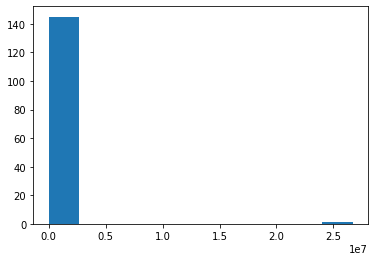

0.0         51
278601.0     2
206121.0     1
261809.0     1
274975.0     1
            ..
365788.0     1
267102.0     1
655037.0     1
224305.0     1
261879.0     1
Name: salary, Length: 95, dtype: int64

In [10]:
#查看每個特徵的資料是否有奇怪的地方
#salary
plt.hist(df["salary"])
plt.show()
df["salary"].value_counts()

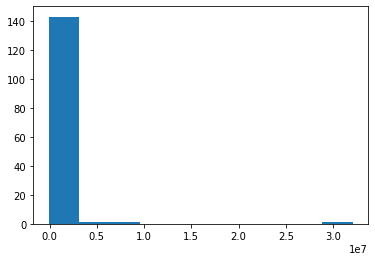

 0.0           107
 50591.0         1
 32083396.0      1
 16586.0         1
 3131860.0       1
 214678.0        1
 51365.0         1
 504610.0        1
 831299.0        1
 27610.0         1
 187469.0        1
 6426990.0       1
 875307.0        1
-102500.0        1
 1130036.0       1
 73122.0         1
 2964506.0       1
 53625.0         1
 774401.0        1
 649584.0        1
 2157527.0       1
 202911.0        1
 85430.0         1
 181755.0        1
 564348.0        1
 227449.0        1
 1848227.0       1
 2144013.0       1
 10259.0         1
 1295738.0       1
 842924.0        1
 7961.0          1
 181993.0        1
 204075.0        1
 77716.0         1
 260455.0        1
 684694.0        1
 178980.0        1
 93585.0         1
 2869717.0       1
Name: deferral_payments, dtype: int64

In [11]:
#deferral_payments
plt.hist(df["deferral_payments"])
plt.show()
df["deferral_payments"].value_counts()

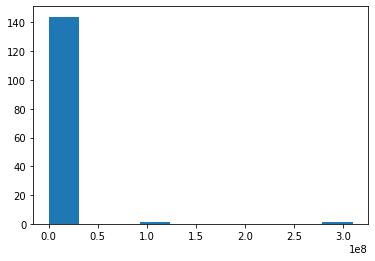

0.0            21
103559793.0     1
2424083.0       1
550981.0        1
111529.0        1
               ..
49288.0         1
505050.0        1
1318763.0       1
4099771.0       1
7961.0          1
Name: total_payments, Length: 126, dtype: int64

In [12]:
#total_payments
plt.hist(df["total_payments"])
plt.show()
df["total_payments"].value_counts()

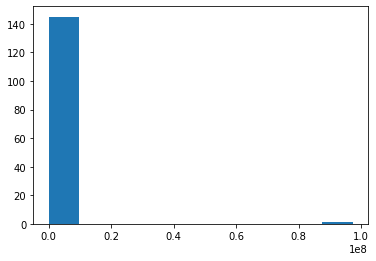

0.0           64
1000000.0      6
600000.0       6
700000.0       5
400000.0       4
750000.0       4
800000.0       4
200000.0       3
325000.0       3
850000.0       3
300000.0       3
900000.0       2
1500000.0      2
2000000.0      2
3000000.0      2
500000.0       2
350000.0       2
250000.0       2
1200000.0      2
100000.0       2
1100000.0      2
1750000.0      1
1700000.0      1
7000000.0      1
788750.0       1
1300000.0      1
450000.0       1
1150000.0      1
8000000.0      1
70000.0        1
4175000.0      1
650000.0       1
1250000.0      1
2500000.0      1
97343619.0     1
3100000.0      1
509870.0       1
5600000.0      1
5249999.0      1
425000.0       1
1350000.0      1
2600000.0      1
Name: bonus, dtype: int64

In [13]:
#bonus
plt.hist(df["bonus"])
plt.show()
df["bonus"].value_counts()

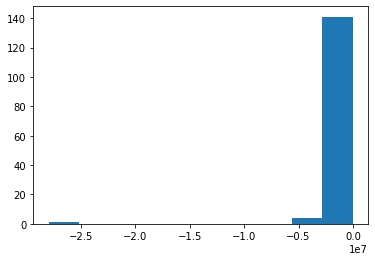

 0.0           97
-25000.0        4
-300000.0       2
-1386055.0      2
-4167.0         1
-485813.0       1
-280000.0       1
-934484.0       1
-33333.0        1
-694862.0       1
-775241.0       1
-3504386.0      1
-113784.0       1
-833.0          1
-38346.0        1
-103750.0       1
-41250.0        1
-27992891.0     1
-575000.0       1
-101250.0       1
-10800.0        1
-5104.0         1
-1042.0         1
-144062.0       1
-3117011.0      1
-1284000.0      1
-17500.0        1
-121284.0       1
-200000.0       1
-98784.0        1
-235000.0       1
-3367011.0      1
-159792.0       1
-3081055.0      1
-262500.0       1
-719000.0       1
-75000.0        1
-2334434.0      1
-400729.0       1
-51042.0        1
-201641.0       1
-100000.0       1
-36666.0        1
-583325.0       1
-125000.0       1
Name: deferred_income, dtype: int64

In [14]:
#deferred_income
plt.hist(df["deferred_income"])
plt.show()
df["deferred_income"].value_counts()

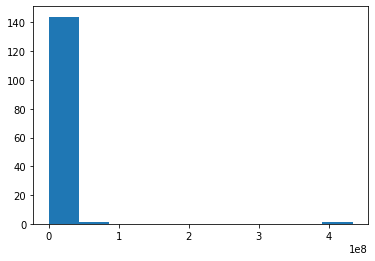

0.0          20
2493616.0     2
126027.0      2
850477.0      1
2282768.0     1
             ..
1794412.0     1
6077885.0     1
1030329.0     1
2332399.0     1
987001.0      1
Name: total_stock_value, Length: 125, dtype: int64

In [15]:
#total_stock_value
plt.hist(df["total_stock_value"])
plt.show()
df["total_stock_value"].value_counts()

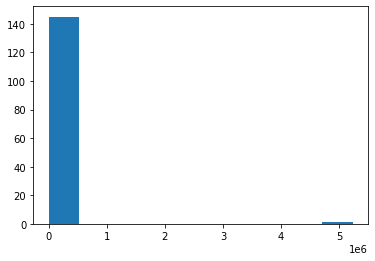

0.0         51
16514.0      2
27861.0      1
50936.0      1
48405.0      1
            ..
129142.0     1
35818.0      1
11892.0      1
9410.0       1
29336.0      1
Name: expenses, Length: 95, dtype: int64

In [16]:
#expenses
plt.hist(df["expenses"])
plt.show()
df["expenses"].value_counts()

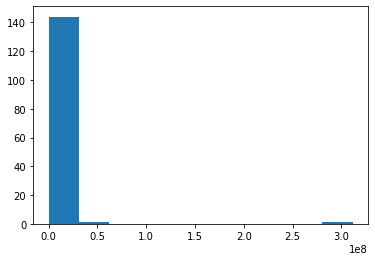

0.0          44
1624396.0     2
4346544.0     1
17378.0       1
2282768.0     1
             ..
2027865.0     1
1451869.0     1
384728.0      1
591250.0      1
2165172.0     1
Name: exercised_stock_options, Length: 102, dtype: int64

In [17]:
#exercised_stock_options
plt.hist(df["exercised_stock_options"])
plt.show()
df["exercised_stock_options"].value_counts()

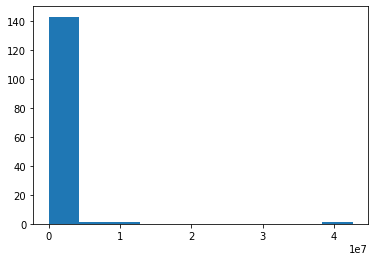

0.0          53
540.0         2
680833.0      1
25553.0       1
2401.0        1
             ..
401481.0      1
465357.0      1
1553729.0     1
7482.0        1
486.0         1
Name: other, Length: 93, dtype: int64

In [18]:
#other
plt.hist(df["other"])
plt.show()
df["other"].value_counts()

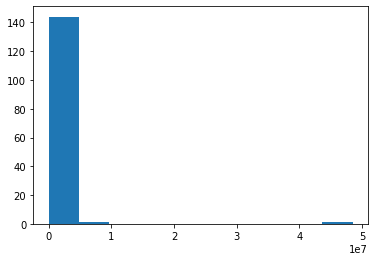

0.0           80
554422.0       4
304805.0       3
1617011.0      3
200000.0       2
694862.0       2
275000.0       2
556416.0       2
175000.0       2
375304.0       2
300000.0       2
350000.0       1
831809.0       1
540751.0       1
369721.0       1
323466.0       1
461912.0       1
476451.0       1
100000.0       1
422158.0       1
769862.0       1
125000.0       1
135836.0       1
69223.0        1
415657.0       1
1725545.0      1
983346.0       1
602671.0       1
256191.0       1
180250.0       1
2035380.0      1
156250.0       1
484000.0       1
974293.0       1
1586055.0      1
312500.0       1
1387399.0      1
1736055.0      1
150000.0       1
75000.0        1
93750.0        1
3600000.0      1
2234774.0      1
808346.0       1
374347.0       1
48521928.0     1
1105218.0      1
1294981.0      1
71023.0        1
365625.0       1
5145434.0      1
335349.0       1
1920000.0      1
Name: long_term_incentive, dtype: int64

In [19]:
#long_term_incentive
plt.hist(df["long_term_incentive"])
plt.show()
df["long_term_incentive"].value_counts()

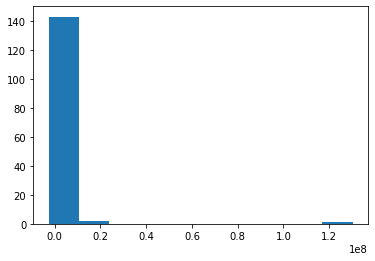

0.0           36
126027.0       5
441096.0       3
315068.0       3
189041.0       3
              ..
13847074.0     1
6843672.0      1
2796177.0      1
417619.0       1
466101.0       1
Name: restricted_stock, Length: 98, dtype: int64

In [20]:
#restricted_stock
plt.hist(df["restricted_stock"])
plt.show()
df["restricted_stock"].value_counts()

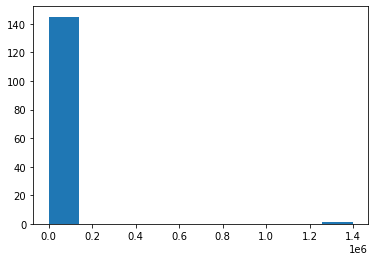

0.0          129
119292.0       1
101250.0       1
108579.0       1
137864.0       1
103750.0       1
38346.0        1
102492.0       1
125034.0       1
98784.0        1
108750.0       1
1398517.0      1
17500.0        1
109298.0       1
36666.0        1
3285.0         1
113784.0       1
112492.0       1
Name: director_fees, dtype: int64

In [21]:
#director_fees
plt.hist(df["director_fees"])
plt.show()
df["director_fees"].value_counts()

In [22]:
#由於財務資料中，有許多筆為0，但並非為離群值，因此使用標準化(Z分數)會比起最大最小化還來得合適。
#另外email資料由於都是呈現次數為主，因此不用再多做其他處理，以原資料即可使用(就像是做過label encoding一樣)。
def normalize_value(x):
    x = (( (x - np.mean(x)) / (np.std(x))))
    return x
df[finanace_features] = normalize_value(df[finanace_features])

In [23]:
df

,bonus,deferral_payments,deferred_income,director_fees,email_address,exercised_stock_options,expenses,from_messages,from_poi_to_this_person,from_this_person_to_poi,long_term_incentive,other,restricted_stock,salary,shared_receipt_with_poi,to_messages,total_payments,total_stock_value
0,0.051638,-0.160618,-1.317090,-0.163701,1,0.600880,-0.055187,18.0,42.0,4.0,0.236181,-0.111887,0.091977,0.024966,864.0,905.0,-0.143267,0.462220
1,0.528935,-0.160618,0.161497,-0.163701,1,0.579935,-0.096032,108.0,88.0,30.0,0.311323,-0.153502,0.468988,0.339454,2042.0,3627.0,0.161392,0.560528
2,-0.140520,-0.160618,0.159739,-0.163701,1,-0.098470,-0.110994,39.0,13.0,14.0,-0.164844,0.269202,-0.081016,-0.070112,91.0,225.0,-0.087428,-0.092807
3,-0.066136,-0.160618,0.161497,-0.163701,1,-0.160992,0.109885,0.0,0.0,0.0,-0.015379,0.087764,-0.070354,-0.064438,0.0,0.0,-0.063259,-0.134570
4,-0.010349,-0.160618,0.050742,-0.163701,1,-0.160992,-0.081001,144.0,199.0,25.0,-0.071767,-0.159398,-0.149433,-0.057205,2188.0,2598.0,-0.101010,-0.158350
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
28,-0.041342,-0.160618,0.161497,-0.163701,1,-0.104577,-0.074645,40.0,23.0,8.0,-0.073152,-0.043530,-0.126229,-0.069301,1336.0,1607.0,-0.085799,-0.110795
29,0.020645,-0.160618,0.161497,-0.163701,1,-0.090342,-0.164061,92.0,28.0,23.0,-0.027345,0.345192,-0.041964,0.028674,2103.0,3187.0,-0.000568,-0.075217
30,-0.165315,0.024091,0.161497,-0.163701,1,-0.075612,-0.164061,12.0,0.0,0.0,-0.050288,-0.159531,-0.161035,-0.166580,23.0,169.0,-0.126074,-0.100429
31,-0.140520,-0.085918,0.161497,-0.163701,1,-0.062868,-0.030196,0.0,0.0,0.0,-0.121444,-0.158814,-0.113639,-0.058904,0.0,0.0,-0.129451,-0.077011


In [24]:
from sklearn.model_selection import train_test_split

train_num = train_Y.shape[0]
train_X = df[:train_num]
test_X = df[train_num:]

X_train, X_test, y_train, y_test = train_test_split(train_X,train_Y, test_size=0.3, random_state=10)

# 決策樹

In [25]:
from sklearn.tree import DecisionTreeClassifier
from sklearn import metrics
dtclf = DecisionTreeClassifier(random_state=5)

dtclf.fit(X_train, y_train)
y_pred = dtclf.predict(X_test)

print("acc_決策樹(未調整參數) :" , metrics.accuracy_score(y_pred, y_test))


acc_決策樹(未調整參數) : 0.8529411764705882


In [26]:
#尋找最佳參數組合
from sklearn.model_selection import RandomizedSearchCV

hyperparameter_space = {'max_depth':[2,3,4,6,8,10,12,15,20], 
                        'min_samples_leaf':[1,2,4,6,8,10,20,30],
                        'min_samples_split':[1,2,3,4,5,6,8,10]}

rs_dtclf = RandomizedSearchCV(dtclf, param_distributions=hyperparameter_space,
                        n_iter=10, scoring="accuracy", random_state=20,
                        n_jobs=-1, cv=10, return_train_score=True)

rs_dtclf.fit(X_train, y_train)
print("最佳參數組合 :" ,rs_dtclf.best_params_)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:670: UserWarning: The least populated class in y has only 9 members, which is less than n_splits=10.
  warnings.warn(("The least populated class in y has only %d"


最佳參數組合 : {'min_samples_split': 10, 'min_samples_leaf': 30, 'max_depth': 4}


In [27]:
dtclf_bestparam = DecisionTreeClassifier(
    min_samples_split = rs_dtclf.best_params_["min_samples_split"],
    min_samples_leaf = rs_dtclf.best_params_["min_samples_leaf"],
    max_depth = rs_dtclf.best_params_["max_depth"],
    random_state= 12)

dtclf_bestparam.fit(X_train,y_train)
y_pred = dtclf_bestparam.predict(X_test)

print("acc_決策樹(調整參數) :" , metrics.accuracy_score(y_pred, y_test))


acc_決策樹(調整參數) : 0.8823529411764706


In [28]:
#另一種比較簡單的寫法
rs_dtclf.best_estimator_.fit(X_train, y_train)
y_pred = rs_dtclf.best_estimator_.predict(X_test)
print("acc_決策樹(調整參數) :" , metrics.accuracy_score(y_pred, y_test))

acc_決策樹(調整參數) : 0.8823529411764706


In [29]:
#匯出預測檔案
y_pred_dtclf =  rs_dtclf.best_estimator_.predict_proba(test_X)[:,1]
sub_dtclf = pd.DataFrame({'name':ids, 'poi':y_pred_dtclf})
sub_dtclf.to_csv('submission_決策樹.csv', index=False)

# 可以看到調整後的參數都有明顯的提升。

# 隨機森林

In [30]:
from sklearn.ensemble import RandomForestClassifier
RFclf = RandomForestClassifier(
    random_state= 40)
RFclf.fit(X_train, y_train)
y_pred = RFclf.predict(X_test)

print("Acc_隨機森林(未改參數) :" , metrics.accuracy_score(y_pred,y_test))

Acc_隨機森林(未改參數) : 0.8823529411764706


In [31]:
hyperparameter_space = {'n_estimators':[2,3,4,5,6,7,8,9,10,20,30,40,50,100], 
                        'max_depth':[1,2,3,4,5,6,7,8,9],
                        "min_samples_split" : [1,2,3,4,5,6,7,8,9,10],
                        "min_samples_leaf" : [1,2,3,4,5]
                       }

rs_RFclf = RandomizedSearchCV(RFclf, param_distributions=hyperparameter_space,
                        n_iter=10, scoring="accuracy", random_state=20,
                        n_jobs=-1, cv=10, return_train_score=True)

rs_RFclf.fit(X_train, y_train)
print("最佳參數組合 :" ,rs_RFclf.best_params_)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:670: UserWarning: The least populated class in y has only 9 members, which is less than n_splits=10.
  warnings.warn(("The least populated class in y has only %d"


最佳參數組合 : {'n_estimators': 100, 'min_samples_split': 2, 'min_samples_leaf': 2, 'max_depth': 7}


In [32]:
RFclf_bestparam = RandomForestClassifier(
    min_samples_split = rs_RFclf.best_params_["min_samples_split"],
    min_samples_leaf = rs_RFclf.best_params_["min_samples_leaf"],
    max_depth = rs_RFclf.best_params_["max_depth"],
    n_estimators = rs_RFclf.best_params_["n_estimators"],
    random_state= 100)

RFclf_bestparam.fit(X_train,y_train)
y_pred = RFclf_bestparam.predict(X_test)

print("acc_決策樹(調整參數) :" , metrics.accuracy_score(y_pred, y_test))


acc_決策樹(調整參數) : 0.9117647058823529


In [33]:
rs_RFclf.best_estimator_.fit(X_train, y_train)
y_pred = rs_RFclf.best_estimator_.predict(X_test)
print("acc_隨機森林(調整參數) :" , metrics.accuracy_score(y_pred, y_test))

acc_隨機森林(調整參數) : 0.9117647058823529


In [34]:
#匯出預測檔案
y_pred_RFclf =  rs_RFclf.best_estimator_.predict_proba(test_X)[:,1]
sub_RFclf = pd.DataFrame({'name':ids, 'poi':y_pred_RFclf})
sub_RFclf.to_csv('submission_隨機森林.csv', index=False)

# gdbt

In [35]:
from sklearn.ensemble import GradientBoostingClassifier
gdbt = GradientBoostingClassifier()

gdbt.fit(X_train, y_train)

y_pred = gdbt.predict(X_test)

print("acc_gdbt(未條參數) :", metrics.roc_auc_score(y_test,y_pred))


acc_gdbt(未條參數) : 0.5


In [36]:
hyperparameter_space = {'n_estimators':[2,3,4,5,6,7,8,9,10,20,30,40,50,100], 
                        'max_depth':[1,2,3,4,5,6,7,8,9],
                        "min_samples_split" : [1,2,3,4,5,6,7,8,9,10],
                        "min_samples_leaf" : [1,2,3,4,5],
                        "tol" : [5,10,15,20,30,40,50,60,70,80,90,100,110,120],
                        "subsample" : [0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9],
                        "learning_rate" : [0.01,0.02,0.03,0.04,0.05,0.06,0.07,0.08,0.09,0.1,0.15,0.2,0.3,0.4,0.5]
                       }

rs_gdbt = RandomizedSearchCV(gdbt, param_distributions=hyperparameter_space,
                        n_iter=10, scoring="accuracy", random_state=20,
                        n_jobs=-1, cv=10, return_train_score=True)

rs_gdbt.fit(X_train, y_train)
print("最佳參數組合 :" ,rs_gdbt.best_params_)




C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:670: UserWarning: The least populated class in y has only 9 members, which is less than n_splits=10.
  warnings.warn(("The least populated class in y has only %d"


最佳參數組合 : {'tol': 30, 'subsample': 0.9, 'n_estimators': 40, 'min_samples_split': 2, 'min_samples_leaf': 1, 'max_depth': 7, 'learning_rate': 0.07}


In [37]:
gdbt_bestparam = GradientBoostingClassifier(
    tol = rs_gdbt.best_params_["tol"],
    min_samples_leaf = rs_gdbt.best_params_["min_samples_leaf"],
    max_depth = rs_gdbt.best_params_["max_depth"],
    n_estimators = rs_gdbt.best_params_["n_estimators"],
    subsample = rs_gdbt.best_params_["subsample"],
    learning_rate = rs_gdbt.best_params_["learning_rate"],
    min_samples_split = rs_gdbt.best_params_["min_samples_split"],
    random_state= 200)

gdbt_bestparam.fit(X_train,y_train)
y_pred = gdbt_bestparam.predict(X_test)

print("acc_決策樹(調整參數) :" , metrics.accuracy_score(y_pred, y_test))

acc_決策樹(調整參數) : 0.8823529411764706


In [38]:
rs_gdbt.best_estimator_.fit(X_train, y_train)
y_pred_gdbt = rs_gdbt.best_estimator_.predict(X_test)
print("acc_gdbt(調整參數) :" , metrics.accuracy_score(y_pred, y_test))

acc_gdbt(調整參數) : 0.8823529411764706


In [39]:
#匯出預測檔案
y_pred_gdbt =  rs_gdbt.best_estimator_.predict_proba(test_X)[:,1]
sub_gdbt = pd.DataFrame({'name':ids, 'poi':y_pred_gdbt})
sub_gdbt.to_csv('submission_gdbt.csv', index=False)

# blending 、 stacking

In [40]:
#Blending，因為有上傳限制，所以這邊就直接看train上面的效果給予權重。
blending_pred = y_pred_dtclf*0.25  + y_pred_RFclf*0.4 + y_pred_gdbt*0.35
sub_blending = pd.DataFrame({'name': ids, 'poi': blending_pred})
sub_blending.to_csv('poi_blending.csv', index=False)

In [41]:
#Stacking

from mlxtend.classifier import StackingClassifier

meta_estimator = gdbt_bestparam
stacking = StackingClassifier(classifiers=[dtclf_bestparam, gdbt_bestparam, RFclf_bestparam], meta_classifier=meta_estimator, use_probas=True, average_probas=False)

stacking.fit(train_X, train_Y)
stacking_pred = stacking.predict_proba(test_X)[:,1]
sub = pd.DataFrame({'name': ids, 'poi': stacking_pred})
sub.to_csv('poi_stacking.csv', index=False)